# **Api de RICK y MORTY**
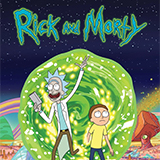

In [1]:
import requests

**Declaración de funciones utilizadas:**

-recorrer: Recorre el json para añadirlos a una lista y permite realizar en bucle con un campo defecto

-get_json: Mediante una URL devuelve el json cargado

-get_apis_untilnext: Recorre los Json uno a uno hasta que ya no haya página siguiente

In [2]:
import json


def recorrer(data,listaValores,campo,bucle=True):
    for valor in data:
        if bucle:
            for valor2 in valor[campo]:
                if valor2 not in listaValores:
                    listaValores.append(valor2)
        else:
            listaValores.append(valor)
    return listaValores

def get_json(url):
     return json.loads(json.dumps((requests.get(url)).json()))

def get_apis_untilnext(json,list,text=None,recursive=False):
    while True:
        list=recorrer(json['results'],list,text,recursive)
        if(json['info']['next'] == None):
             break
        print(json["info"]["next"])
        json=get_json(json['info']['next'])
    return list


Aquí tenemos el código que devolverá la lista de Personajes y la lista de episodios de forma asincrona

In [3]:
#from collections import deque

import concurrent.futures
from pprint import pprint
import threading

listaPersonajes=[]
listaEpisodios=[]


"""
    Si tuvieramos más páginas de episodios nos interesaría que fuera multihilo para dividir la gestión de los JSON
    pero al ser solo 3 páginas de episodios no hace falta crear un ThreadPool

    -Get json utiliza una URL para devolver el json de ella
    -Se utiliza multihilo ya que las dos apis las recojo de manera independiente para aumentar la velocidad y que se gestione cada una por separado sin esperar que la otra acabe
"""
tEp=threading.Thread(target=get_apis_untilnext,args=[get_json("https://rickandmortyapi.com/api/episode/"),listaEpisodios,])
tPer=threading.Thread(target=get_apis_untilnext,args=[get_json("https://rickandmortyapi.com/api/character/"),listaPersonajes,])
tEp.start()
tPer.start()
tEp.join()
tPer.join()
#get_apis_untilnext(get_json("https://rickandmortyapi.com/api/episode/"),listaEpisodios,"name",False)
#get_apis_untilnext(get_json("https://rickandmortyapi.com/api/character/"),listaPersonajes,"name",False)
#with concurrent.futures.ThreadPoolExecutor() as executor:
#    threadEp=executor.submit(get_apis_untilnext,args=[get_json("https://rickandmortyapi.com/api/episode/"),listaEpisodios,"name",False])
#    threadPer=executor.submit(get_apis_untilnext,args=[get_json("https://rickandmortyapi.com/api/character/"),listaPersonajes,"name",False])
#    listaEpisodios=threadEp.result()
#    listaPersonajes=threadPer.result()


https://rickandmortyapi.com/api/episode/?page=2
https://rickandmortyapi.com/api/episode/?page=3
https://rickandmortyapi.com/api/character/?page=2
https://rickandmortyapi.com/api/character/?page=3
https://rickandmortyapi.com/api/character/?page=4
https://rickandmortyapi.com/api/character/?page=5
https://rickandmortyapi.com/api/character/?page=6
https://rickandmortyapi.com/api/character/?page=7
https://rickandmortyapi.com/api/character/?page=8
https://rickandmortyapi.com/api/character/?page=9
https://rickandmortyapi.com/api/character/?page=10
https://rickandmortyapi.com/api/character/?page=11
https://rickandmortyapi.com/api/character/?page=12
https://rickandmortyapi.com/api/character/?page=13
https://rickandmortyapi.com/api/character/?page=14
https://rickandmortyapi.com/api/character/?page=15
https://rickandmortyapi.com/api/character/?page=16
https://rickandmortyapi.com/api/character/?page=17
https://rickandmortyapi.com/api/character/?page=18
https://rickandmortyapi.com/api/character/?pa

[{'id': 1,
  'name': 'Rick Sanchez',
  'status': 'Alive',
  'species': 'Human',
  'type': '',
  'gender': 'Male',
  'origin': {'name': 'Earth (C-137)',
   'url': 'https://rickandmortyapi.com/api/location/1'},
  'location': {'name': 'Citadel of Ricks',
   'url': 'https://rickandmortyapi.com/api/location/3'},
  'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
  'episode': ['https://rickandmortyapi.com/api/episode/1',
   'https://rickandmortyapi.com/api/episode/2',
   'https://rickandmortyapi.com/api/episode/3',
   'https://rickandmortyapi.com/api/episode/4',
   'https://rickandmortyapi.com/api/episode/5',
   'https://rickandmortyapi.com/api/episode/6',
   'https://rickandmortyapi.com/api/episode/7',
   'https://rickandmortyapi.com/api/episode/8',
   'https://rickandmortyapi.com/api/episode/9',
   'https://rickandmortyapi.com/api/episode/10',
   'https://rickandmortyapi.com/api/episode/11',
   'https://rickandmortyapi.com/api/episode/12',
   'https://rickandmortyapi.com

In [4]:
pprint(listaPersonajes)
pprint(listaEpisodios)

[{'created': '2017-11-04T18:48:46.250Z',
  'episode': ['https://rickandmortyapi.com/api/episode/1',
              'https://rickandmortyapi.com/api/episode/2',
              'https://rickandmortyapi.com/api/episode/3',
              'https://rickandmortyapi.com/api/episode/4',
              'https://rickandmortyapi.com/api/episode/5',
              'https://rickandmortyapi.com/api/episode/6',
              'https://rickandmortyapi.com/api/episode/7',
              'https://rickandmortyapi.com/api/episode/8',
              'https://rickandmortyapi.com/api/episode/9',
              'https://rickandmortyapi.com/api/episode/10',
              'https://rickandmortyapi.com/api/episode/11',
              'https://rickandmortyapi.com/api/episode/12',
              'https://rickandmortyapi.com/api/episode/13',
              'https://rickandmortyapi.com/api/episode/14',
              'https://rickandmortyapi.com/api/episode/15',
              'https://rickandmortyapi.com/api/episode/16',
        